In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def load_json(filename):
    with open(filename, 'r') as f:
        loaded_obj = json.load(f)
        
    return loaded_obj


In [3]:
chi_type = 'chi2'

In [4]:
js_results = load_json(f'../data/ATLAS_MD/output_js_results/ATLAS_proteins_js_results_{chi_type}.json')
js_results_multi = load_json(f'../data/ATLAS_MD/output_js_results/ATLAS_proteins_js_multiresis_results_{chi_type}.json')
js_results_fixed = load_json(f'../data/ATLAS_MD/output_js_results/ATLAS_proteins_js_fixedresis_results_{chi_type}.json')

In [5]:
len(js_results['reweighted'])

1390

In [6]:
def plot_boxplot_with_points_density(*args, colors=None,labels=None, title=None,ylabel=r'$JS_{div}$',spread_scale=1):
    """
    Plots a boxplot with raw points underneath for each list passed.
    
    Parameters:
        *args: Each argument is a list or array of points.
        labels (list): Optional, a list of labels corresponding to each series.
        title (str): Optional, title for the plot.
    """
    
    # Create the figure and axis
    plt.figure(figsize=(10, 3))
    meanprops = {'color': 'red', 'linewidth': 20}
    #flierprops = {'color':'black', 'ms':1}
    # Plot the boxplot
    sns.boxplot(data=args, width=0.2, color='white', meanprops=meanprops, showfliers=False)
    
    for i, data in enumerate(args):
        w,r=np.histogram(data,bins=30,density=True)
        # Add jitter to avoid points overlapping
        x = spread_points_normal(data, bins=40, loc= i+0.4, std_factor=spread_scale)

        # Plot the raw data points
        if colors:
            for j, (x_val, y_val) in enumerate(zip(x, data)):
                plt.scatter(x_val, y_val, color=colors[j], ms=0.1, alpha=0.7,edgecolor='w',s=10)
        else:
            plt.plot(x, data, marker='o', ls='none', color='black', ms=0.1, alpha=0.5)
    plt.ylim(-0.01,1)
    plt.ylabel(ylabel)
    plt.grid(axis='y',alpha=0.2,zorder=-200)
    # Add labels if provided
    if labels:
        plt.xticks(np.arange(len(args))+0.2, labels)
    
    # Add title if provided
    if title:
        plt.title(title)

In [7]:
def spread_points_normal(data, bins=10, loc=1.0, std_factor=1.0):

    # Compute histogram with specified number of bins
    hist, bin_edges = np.histogram(data, bins=bins, density=True)
    
    # Determine the bin index for each point
    bin_indices = np.digitize(data, bins=bin_edges, right=False) - 1  # Adjust index to 0-based
    bin_indices = np.clip(bin_indices, 0, bins - 1)  # Ensure no out-of-range indices

    # Compute bin centers

    # Create x-coordinates for each point
    x = np.zeros_like(data)
    for i in range(bins):
        # Points in the current bin
        points_in_bin = (bin_indices == i)
        num_points = np.sum(points_in_bin)

        # Spread points normally around the bin center inversely proportional to density
        if num_points > 0:
            std_dev = hist[i] * std_factor * np.sqrt(len(data))  # Adjust standard deviation
            #print(loc,std_dev)

            x[points_in_bin] = np.random.normal(
                loc=loc,       # Center of the normal distribution
                scale=std_dev,    # Adjusted spread
                size=num_points   # Number of points in the bin
            )
    return x

In [8]:
js_results_arrs = {}
for ensemble_model in js_results.keys():
    js_vs_residues_all = np.array([])
    for js_vs_residues in js_results[ensemble_model].values():
        js_vs_residues_all = np.concatenate((js_vs_residues_all, js_vs_residues))
    js_results_arrs[ensemble_model] = js_vs_residues_all

<>:1: SyntaxWarning: invalid escape sequence '\c'
<>:1: SyntaxWarning: invalid escape sequence '\c'
<>:1: SyntaxWarning: invalid escape sequence '\c'
<>:1: SyntaxWarning: invalid escape sequence '\c'
<>:1: SyntaxWarning: invalid escape sequence '\c'
<>:1: SyntaxWarning: invalid escape sequence '\c'
/tmp/ipykernel_267399/2370245870.py:1: SyntaxWarning: invalid escape sequence '\c'
  plot_boxplot_with_points_density(js_results_arrs['af2'], js_results_arrs['top8000'], js_results_arrs['prior'], js_results_arrs['reweighted'], labels=['AF2 structure','Top8000','AF2$\chi$ prior','AF2$\chi$'], ylabel=r'$JS_{div}$ to MD distribution',title=f'$\chi${chi_type[-1]}', spread_scale=0.00003)
/tmp/ipykernel_267399/2370245870.py:1: SyntaxWarning: invalid escape sequence '\c'
  plot_boxplot_with_points_density(js_results_arrs['af2'], js_results_arrs['top8000'], js_results_arrs['prior'], js_results_arrs['reweighted'], labels=['AF2 structure','Top8000','AF2$\chi$ prior','AF2$\chi$'], ylabel=r'$JS_{div}$ t

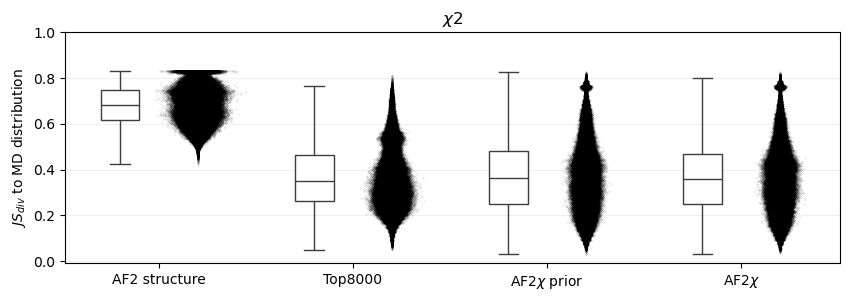

In [9]:
plot_boxplot_with_points_density(js_results_arrs['af2'], js_results_arrs['top8000'], js_results_arrs['prior'], js_results_arrs['reweighted'], labels=['AF2 structure','Top8000','AF2$\chi$ prior','AF2$\chi$'], ylabel=r'$JS_{div}$ to MD distribution',title=f'$\chi${chi_type[-1]}', spread_scale=0.00003)
plt.savefig(f'../figures/ATLAS_MD_{chi_type}.pdf',bbox_inches='tight')

In [10]:
js_results_arrs_fixed = {}
for ensemble_model in js_results_fixed.keys():
    js_vs_residues_all = np.array([])
    for js_vs_residues in js_results_fixed[ensemble_model].values():
        js_vs_residues_all = np.concatenate((js_vs_residues_all, js_vs_residues))
    js_results_arrs_fixed[ensemble_model] = js_vs_residues_all

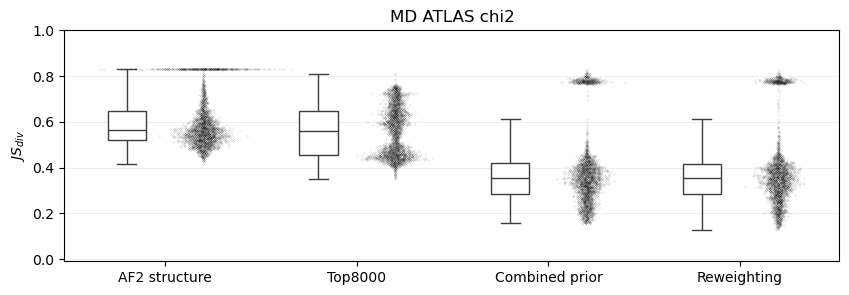

In [11]:
plot_boxplot_with_points_density(js_results_arrs_fixed['af2'], js_results_arrs_fixed['top8000'], js_results_arrs_fixed['prior'], js_results_arrs_fixed['reweighted'], labels=['AF2 structure','Top8000','Combined prior','Reweighting'], title=f'MD ATLAS {chi_type}', spread_scale=0.0002)

In [12]:
js_results_arrs_multi = {}
for ensemble_model in js_results_multi.keys():
    js_vs_residues_all = np.array([])
    for js_vs_residues in js_results_multi[ensemble_model].values():
        js_vs_residues_all = np.concatenate((js_vs_residues_all, js_vs_residues))
    js_results_arrs_multi[ensemble_model] = js_vs_residues_all

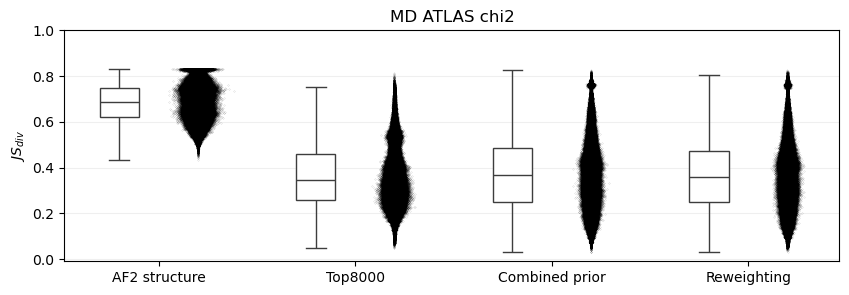

In [13]:
plot_boxplot_with_points_density(js_results_arrs_multi['af2'], js_results_arrs_multi['top8000'], js_results_arrs_multi['prior'], js_results_arrs_multi['reweighted'], labels=['AF2 structure','Top8000','Combined prior','Reweighting'], title=f'MD ATLAS {chi_type}', spread_scale=0.00002)